# Chapter 4: Roots of (non-linear) Equations

## 1. Introduction

Goal of this chapter:

**Find the solutions of f(x)=0, where the function f is given.**

The solutions of this equation are called the *roots* of the equation or the *zeroes* of the function f.

The function $f$ might be defined as:
1. A mathematical statement, for instance: f(x) = log(x)
2. A computer algorithm.

$f$ might have:
1. A single zero, for instance: f(x) = log(x)
2. Multiple zeroes: f(x) = $x^2$
3. An infinite number of zeroes: f(x) = cos(x)
4. No zero: f(x) = cos(x) + 2

We focus only on real zeroes.

The methods presented in this chapter:
* Are meant to find *a single* root.
* Are iterative: they start from an estimate of the root and refine it.
* Usually require prior *bracketing* of the root: determine its lower and upper bounds.
* Assume that $f$ is *continuous* in the bracket.

Extensions can be derived to lift some of these conditions.

In [36]:
# Enlarge the plot size, everywhere in the notebook
def set_size(preset='screen'):
    import matplotlib
    if preset == 'screen':
        matplotlib.rcParams['figure.figsize'] = (7, 4)
        matplotlib.rcParams['axes.titlesize'] = 10
        matplotlib.rcParams['axes.labelsize'] = 10
    if preset == 'presentation':
        matplotlib.rcParams['figure.figsize'] = (14, 8)
        matplotlib.rcParams['axes.titlesize'] = 30
        matplotlib.rcParams['axes.labelsize'] = 30

set_size('presentation')

### Illustration

Bracketing and iterative root-finding method.

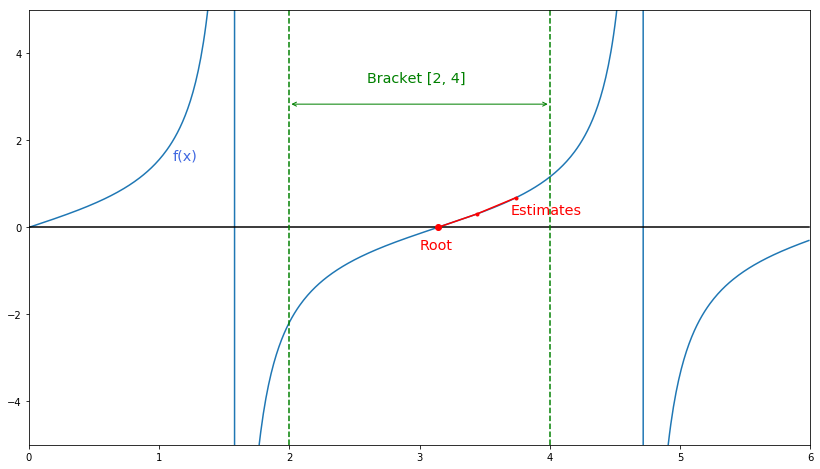

In [75]:
from matplotlib import pyplot as plt
from numpy import arange, tan, zeros
from math import pi

def intro_plot():
    xmin = 0
    xmax = 6
    x = arange(xmin, xmax, 0.01)
    plt.plot(x, tan(x), '-')
    plt.plot(x, zeros(x.size), '-', color='black')
    miny = -5
    maxy = 5
    plt.ylim(miny, maxy)
    plt.xlim(xmin, xmax)

    # Annotation
    label_size = 'x-large'
    plt.annotate("f(x)", xy=(1.1, tan(1)), fontsize=label_size, color='royalblue')

    # Bracket
    minx = 2
    maxx = 4
    bracket_color = 'green'
    plt.plot([minx, minx], [miny, maxy], '--', color=bracket_color)
    plt.plot([maxx, maxx], [miny, maxy], '--', color=bracket_color)
    ybracket = 2/3*(maxy)
    plt.annotate("Bracket [{}, {}]".format(minx, maxx), xy=((minx+maxx)/2-0.4, ybracket), color=bracket_color, fontsize=label_size)
    plt.annotate(s='', xy=(minx, ybracket-0.5), xytext=(maxx,ybracket-0.5), arrowprops=dict(arrowstyle='<->', color=bracket_color))
    
    # Root
    from math import pi
    #plt.plot([0, 6], [0, 0], '--', color='black')
    plt.plot([pi], [0], 'o', color='red')
    plt.annotate("Root", xy=(3, -0.5), color='red', fontsize=label_size)
    return plt

plt = intro_plot()
label_size = 'x-large'
# Estimates
step = 0.3
maxx = 4
x = arange(pi, maxx, step)
plt.plot(x, tan(x), '.-', color='red')
plt.annotate('Estimates', xy=(maxx-step, tan(pi+step)), color='red', fontsize=label_size)
plt.show()


## 2. Incremental Search

Main idea
* If $f(x_1)$ and $f(x_2)$ have opposite signs, then the root is in [$x_1$, $x_2$].
* $\Rightarrow$ Evaluate $f$ at interval $\Delta x$ and look for a change of sign.

### Illustration

$f(x_1)$ and $f(x_2)$ have different signs $\Rightarrow$ the root is in [$x_1$, $x_2$].

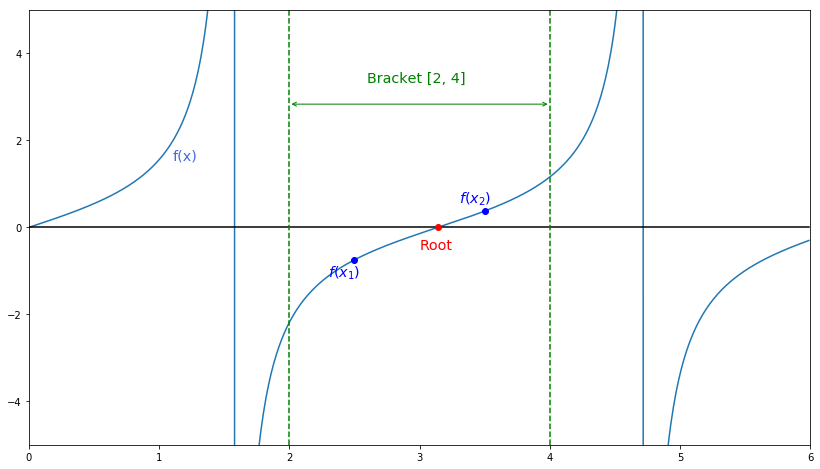

In [78]:
plt = intro_plot()
plt.plot([])
x1 = 2.5
x2 = 3.5
label_color = 'blue'
plt.plot([x1, x2], [tan(x1), tan(x2)], 'o', color=label_color)
shift = 0.4
plt.annotate(s="$f(x_1)$", xy=(x1-shift/2, tan(x1)-shift), fontsize=label_size, color=label_color)
plt.annotate(s="$f(x_2)$", xy=(x2-shift/2, tan(x2)+shift/2), fontsize=label_size, color=label_color)
plt.show()

### Example

Using *incremental search* with $\Delta x=0.1$, find the zero of $f(x)=x^2-2$ in the interval [1, 2].

### Implementation

In [79]:
from numpy import sign
def root_find_incremental(f, xmin, xmax, delta_x):
    '''
    f is the function for which we will find a zero
    xmin and xmax define the bracket
    delta_x is the step used in incremental search
    Returns (a, b), the bounds between which the root is located
    a = b = None if no root could be found
    '''
    a = xmin
    b = a + delta_x
    fa = f(a)
    fb = f(b)
    estimates = [] # we will store the successive estimates in this list, for visualization purposes
    while(b <= xmax):
        root_estimate = (a+b)/2
        estimates.append(root_estimate)
        if sign(fa) != sign(fb):
            return root_estimate, estimates
        a = b
        b += delta_x
        fa = fb
        fb = f(b)
    raise Exception("Could not find root in bracket")

### Example

In [80]:
f = tan
x, estimates = root_find_incremental(f, 2, 4, 0.01)
print(x, "({} estimates)".format(len(estimates)))

3.1449999999999756 (115 estimates)


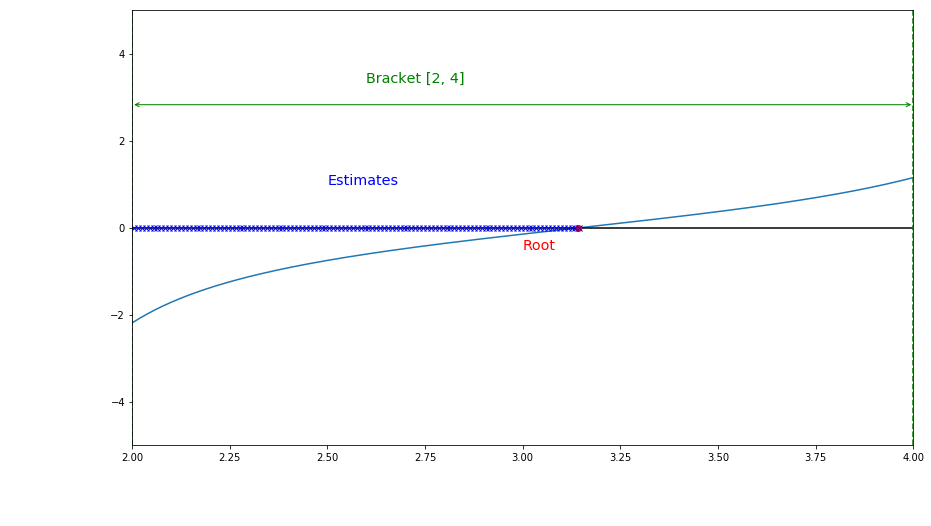

In [81]:
# Plot
plt = intro_plot()
plt.xlim(2, 4)
plt.plot(estimates, zeros(len(estimates)), 'x', color='blue')
plt.annotate("Estimates", xy=(2.5, 1), color='blue', fontsize=label_size)
plt.show()

### Issues
* Accurate estimation of the root requires a small $\Delta x$ value
* Number of evaluations of $f$ is $\frac{x_{\mathrm{max}}-x_{\mathrm{min}}}{\Delta x}$ (worst case)

## 3. Method of Bisection

The bisection method *halves* the interval until it becomes smaller than $\Delta x$.

Main idea:
* If there is a root in [$x_1$, $x_2$], then f($x_1$) and f($x_2$) have opposite signs (as in incremental search).
* Define $x_3=\frac{x_1+x_2}{2}$. If f($x_1$) and f($x_3$) have opposite signs, then the root is in [$x_1$, $x_3$]; otherwise, it's in [$x_2$, $x_3$]. 

### Illustration



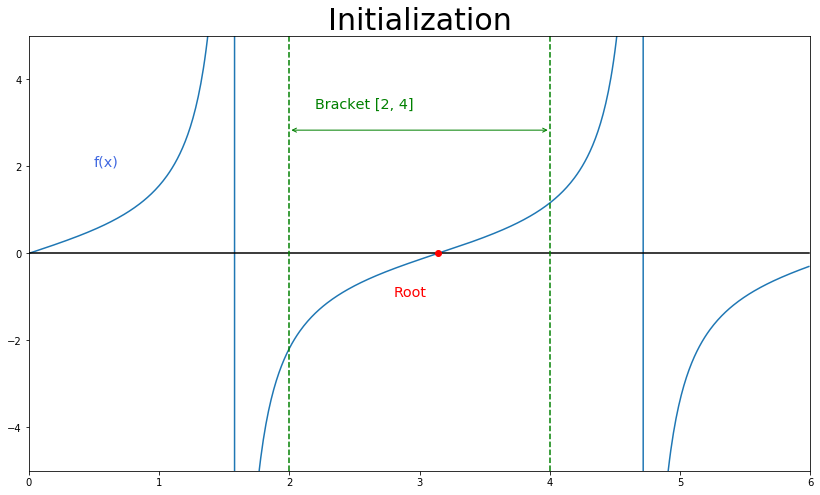

In [42]:
graph = intro_plot()
graph.title("Initialization")
graph.show()

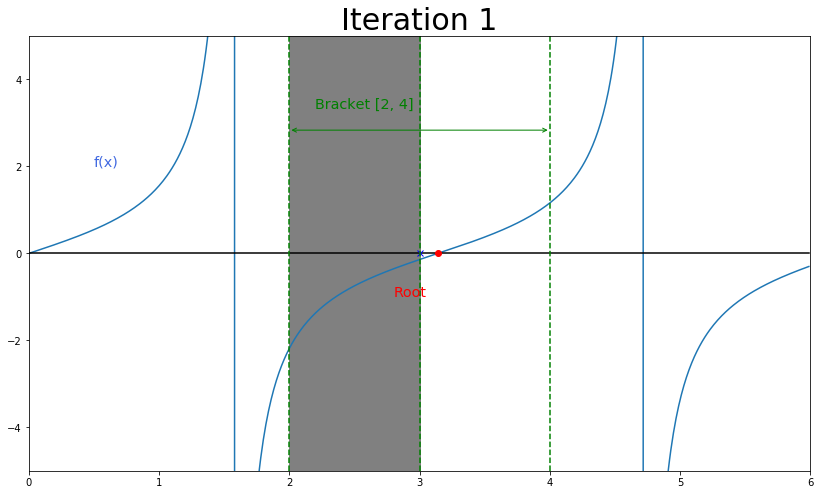

In [43]:
graph = intro_plot()
graph.title("Iteration 1")
graph.plot([3], [0], 'x', color='blue')
graph.plot([3, 3], [-5, 5], '--', color='green')
rect = graph.Rectangle([2, -5], 1, 10, color='gray')
graph.gca().add_patch(rect)
graph.show()

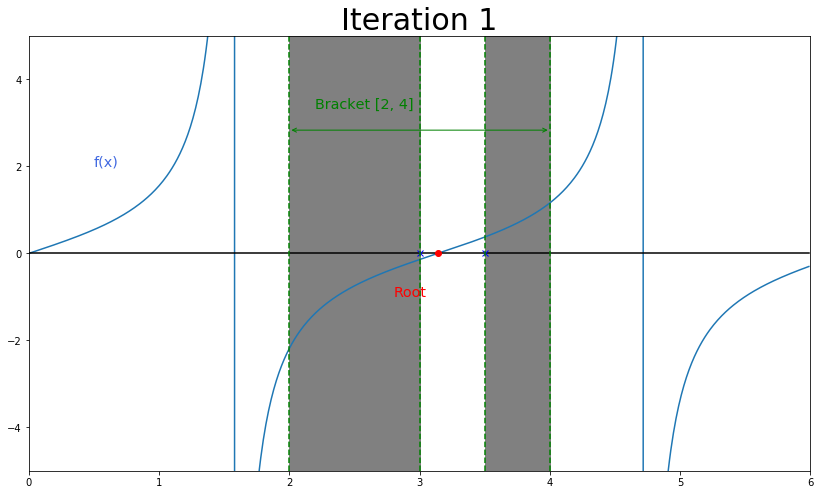

In [44]:
graph = intro_plot()
graph.title("Iteration 1")
graph.plot([3], [0], 'x', color='blue')
graph.plot([3, 3], [-5, 5], '--', color='green')
graph.plot([3.5], [0], 'x', color='blue')
graph.plot([3.5, 3.5], [-5, 5], '--', color='green')
rect = graph.Rectangle([2, -5], 1, 10, color='gray')
graph.gca().add_patch(rect)
rect = graph.Rectangle([3.5, -5], 0.5, 10, color='gray')
graph.gca().add_patch(rect)
graph.show()

### Example

Using *bisection*, find the zero of $f(x)=x^2-2$ in the interval [1, 2].

### Implementation

In [45]:
def root_find_bisection(f, xmin, xmax, delta_x):
    '''
    f is the function for which we will find a zero
    xmin and xmax define the bracket
    delta_x is the desired accuracy
    Returns (a+b)/2, where the root is in [a, b] and |b-a| <= delta_x
    Returns None if no root could be found
    '''
    
    a = xmin
    b = xmax
    fa = f(a)
    fb = f(b)
    if sign(fa) == sign(fb):
        return None # Root is not bracketed
    estimates = [] # we will store the successive estimates in this list, for visualization purposes
    while(b-a > delta_x):
        # At this point, fa and fb always have different signs
        c = (a+b)/2
        estimates.append(c)
        fc = f(c)
        if sign(fc) == sign(fa):
            # The root must be in [c, b]
            a = c
            fa = fc
        else:
            b = c
            fb = fc
    estimates.append((a+b)/2)
    return (a+b)/2, estimates

### Example

In [46]:
f = tan
x, estimates = root_find_bisection(f, 2, 4, 0.01)
print(x, "({} estimates)".format(len(estimates)))

3.14453125 (9 estimates)


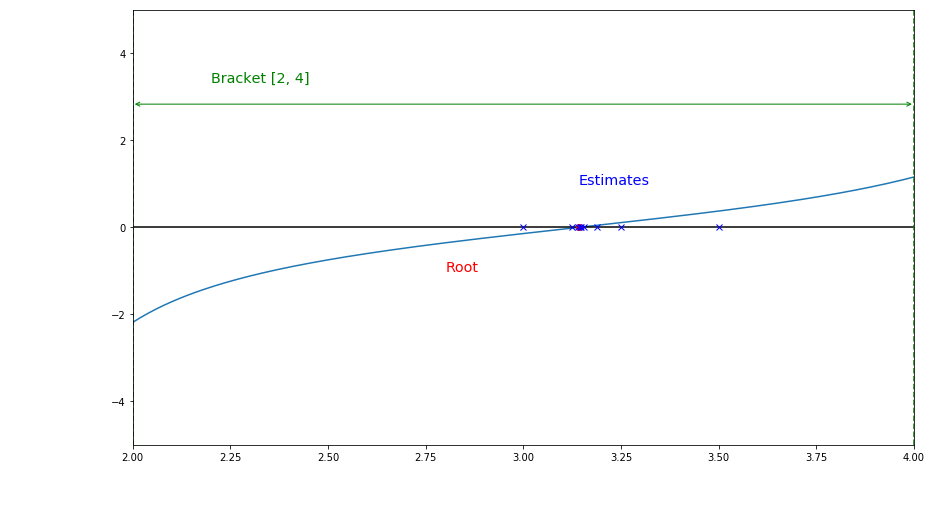

In [47]:
# Plot
plt = intro_plot()
plt.xlim(2, 4)
plt.plot(estimates, zeros(len(estimates)), 'x', color='blue')
plt.annotate("Estimates", xy=(pi, 1), color='blue', fontsize=label_size)
plt.show()

## 4. False Position Method

The False Position Method (a.k.a. *regula falsi*) uses a linear interpolation of $f$ between the two bounds of the bracket.

### Illustration

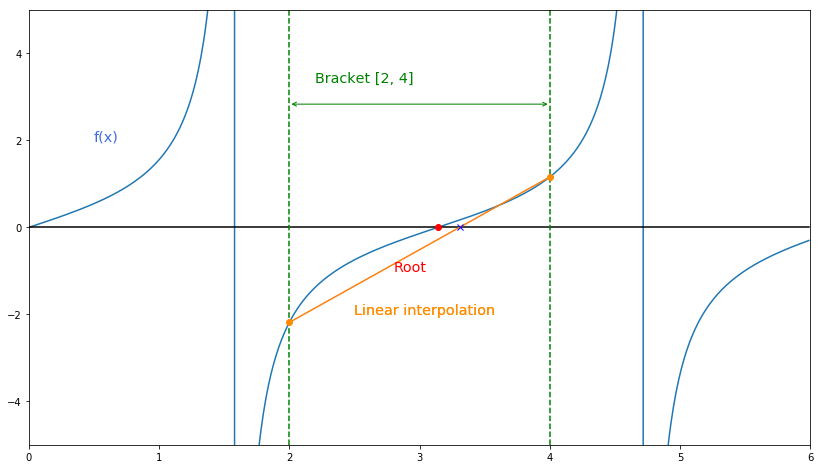

In [48]:
plt = intro_plot()
a = 2 ; b = 4
plt.plot([a, b], [tan(a), tan(b)], '-')
plt.plot([a, b], [tan(a), tan(b)], 'o', color='darkorange')
plt.annotate("Linear interpolation", xy=(2.5, -2), fontsize=label_size, color='darkorange')
x = (a*tan(b)-b*tan(a))/(tan(b)-tan(a))
plt.plot([x], [0], 'x', color='blue')
plt.annotate("Linear interpolation", xy=(2.5, -2), fontsize=label_size, color='darkorange')
plt.show()

### Formulation

Let [a, b] be the interval in which the zero has been bracketed.

Let $y = \alpha x + \beta$ be the straight line interpolating $f$ at a and b.

We have:
$$
\alpha = \frac{f(b)-f(a)}{b-a} \quad \beta = \frac{bf(a)-af(b)}{b-a}
$$

The method estimates the zero to be $c$ such that:
$$
\alpha c + \beta = 0
$$
which gives:
$$
c = \frac{af(b)-bf(a)}{f(b)-f(a)}
$$

### Example

Using the *false position* method, find the zero of $f(x)=x^2-2$ in the interval [1, 2].

### Implementation

In [49]:
from numpy import sign

def false_position(f, a, b, delta_x):
    '''
    '''
    fa = f(a)
    fb = f(b)
    if sign(fa) == sign(fb):
        raise Exception("Root hasn't been bracketed")
    estimates = []
    while True:
        c = (a*fb-b*fa)/(fb-fa)
        estimates.append(c)
        fc = f(c)
        if sign(fc) == sign(fa):
            a = c
            fa = fc
        else:
            b = c
            fb = fc
        if len(estimates) >=2 and abs(estimates[-1] - estimates[-2]) <= delta_x:
            break
    return c, estimates

In [50]:
from math import tan
x, estimates = false_position(tan, 2, 4, 0.01)
print(x, "({} estimates)".format(len(estimates)))

3.149071782828593 (5 estimates)


## 5. Newton-Raphson Method

This method is simple and fast, but it requires that the derivative of the function can be computed. 

This method approximates f by the straight line tangent to the curve at $x_i$:

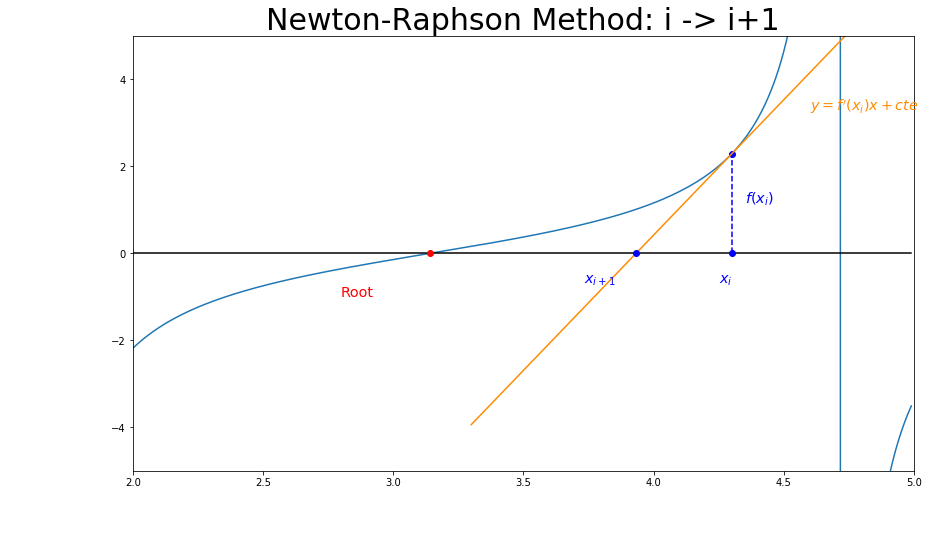

In [51]:
def diff(x): # derivative
        from math import sin, cos
        return sin(x)**2/cos(x)**2 + 1
    
def newton_plot(f, diff, xmin=2, xmax=5, ymin=-5, ymax=5, xi=4.3, root=True):
    x = arange(xmin, xmax, 0.01)
    vals = zeros(x.size)
    for i in range(x.size):
        vals[i] = f(x[i])
    plt.plot(x, vals, '-')
    plt.plot(x, zeros(x.size), '-', color='black')
    miny = ymin
    maxy = ymax
    plt.ylim(miny, maxy)
    plt.xlim(xmin, xmax)

    # Annotation
    label_size = 'x-large'
    plt.annotate("f(x)", xy=(0.5, 2), fontsize=label_size, color='royalblue')

    # Root
    if root:
        from math import pi
        #plt.plot([0, 6], [0, 0], '--', color='black')
        plt.plot([pi], [0], 'o', color='red')
        plt.annotate("Root", xy=(2.8, -1), color='red', fontsize=label_size)

    #xi
    plt.plot([xi], [0], 'o', color='blue')
    plt.plot([xi], [f(xi)], 'o', color='blue')
    plt.annotate("$x_i$", xy=(xi-.05, -.7), color='blue', fontsize=label_size)
    plt.plot([xi, xi], [0, f(xi)], '--', color='blue')
    
    # tangent line
    plt.plot([xi-1, xi, xi+1], [f(xi)-diff(xi), f(xi), f(xi)+diff(xi)], color='darkorange')
    plt.annotate("$y=f'(x_i)x+cte$", xy=(xi+0.3, tan(xi)+1), color='darkorange', fontsize=label_size)
    return plt

from matplotlib import pyplot as plt
graph = newton_plot(tan, diff)
# xi+1
xi=4.3
plt.annotate("$f(x_i)$", xy=(xi+0.05, tan(xi)/2), color='blue', fontsize=label_size)
x2 = xi-tan(xi)/diff(xi)
graph.plot([x2], [0], 'o', color='blue')
graph.annotate("$x_{i+1}$", xy=(x2-.2, -.7), color='blue', fontsize=label_size)
graph.title("Newton-Raphson Method: i -> i+1")
graph.show()

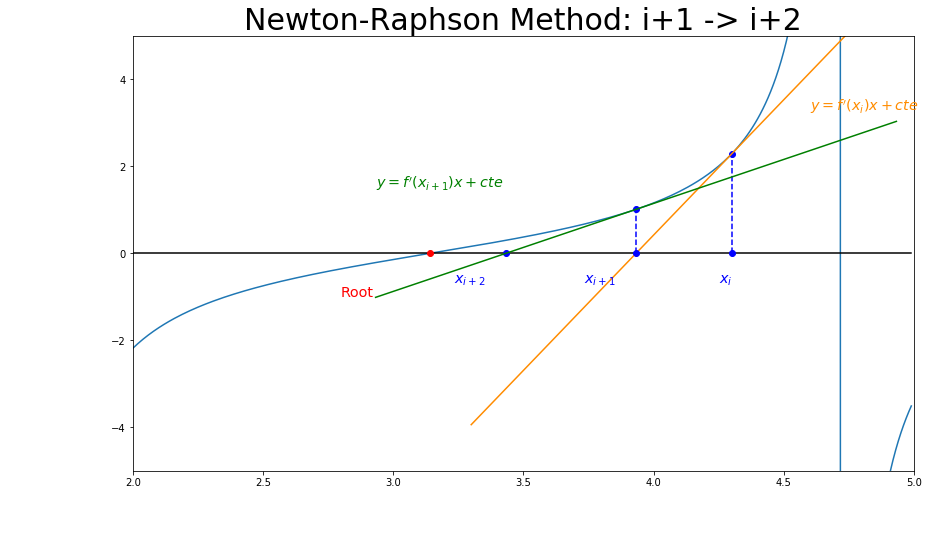

In [52]:
# xi+2
x3 = x2-tan(x2)/diff(x2)

# tangent line at xi+1
graph = newton_plot(tan, diff)
graph.plot([x2], [0], 'o', color='blue')
graph.annotate("$x_{i+1}$", xy=(x2-.2, -.7), color='blue', fontsize=label_size)
plt.plot([x2, x2], [0, tan(x2)], '--', color='blue')
graph.plot([x2], [tan(x2)], 'o', color='blue')
graph.plot([x3], [0], 'o', color='blue')
graph.annotate("$x_{i+2}$", xy=(x3-.2, -.7), color='blue', fontsize=label_size)
graph.plot([x2-1, x2, x2+1], [tan(x2)-diff(x2), tan(x2), tan(x2)+diff(x2)], color='green')
graph.annotate("$y=f'(x_{i+1})x+cte$", xy=(x2-1, tan(x2)+0.5), color='green', fontsize=label_size)
graph.title("Newton-Raphson Method: i+1 -> i+2")
graph.show()

Graphically, the slope of the tangent to $f$ at $x_i$ (orange line) is:
$$
s = \frac{f(x_i)}{x_i-x_{i+1}}
$$
And by definition of $f'$, we also have $s = f'(x_i)$.

Thus:
$$
f'(x_i) = \frac{f(x_i)}{x_i-x_{i+1}}
$$
which gives:
$$
x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}
$$

### Example

Use the *Newton-Raphson* method to determine successive estimates of a zero of $f(x)=x^2-2$, starting with an estimate of $5$. 

### Implementation

In [53]:
def newton_raphson(f, diff, init_x, tol, max_iter=1000):
    '''
    f is the function for which a zero is seeked
    diff is the derivative of the function
    init_x is the initial estimate
    tol is the tolerance (accuracy) of the solution
    max_iter is the desired maximal number of iterations
    '''
    x = init_x
    estimates = []
    for i in range(max_iter): # we will break out of the loop when we find the root
        delta_x = -f(x)/diff(x)
        x = x + delta_x
        estimates.append(x)
        if abs(delta_x) <= tol:
            return x, estimates
    raise Exception("Unable to find a root")

### Example

In [56]:
from math import tan
def diff_tan(x):
    return 1 + tan(x)**2
x, estimates = newton_raphson(tan, diff_tan, 3, 0.01)
print(x, "({} estimates)".format(len(estimates)))

3.1415926491252555 (2 estimates)


### Other tests (failed)

##### Null derivative

In [58]:
def f1(x):
    return x**2-2

def diff1(x):
    return 2*x

newton_raphson(f1, diff1, 0, 10E-5)

ZeroDivisionError: division by zero

What happened:

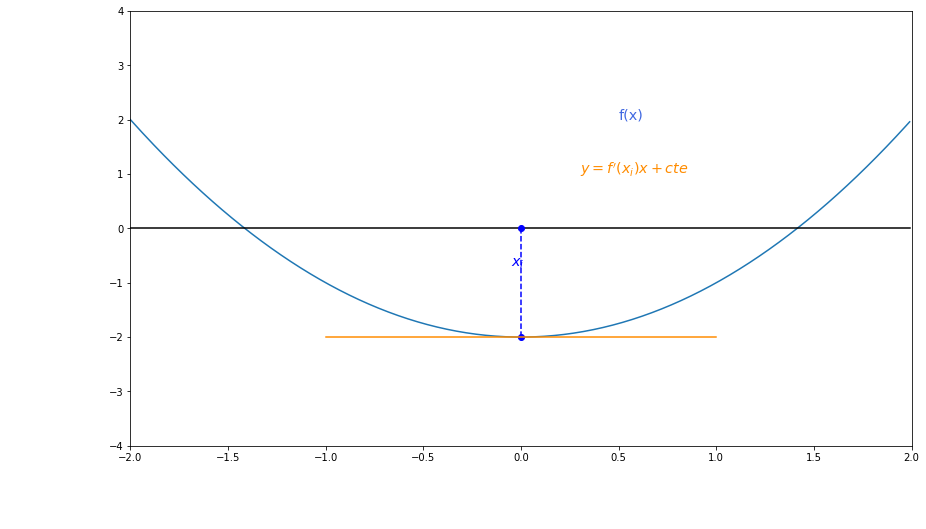

In [59]:
graph = newton_plot(f1, diff1, -2, 2, -4, 4, 0)

$\Rightarrow$ the method assumes that **$f'$ is not zero at and around the root**.

In [60]:
def f2(x):
    from math import exp, sin
    return exp(-0.1*x)*sin(x*3)+0.5

def diff2(x):
    from math import exp, sin, cos
    return -0.1*exp(-0.1*x)*sin(x*3)+exp(-0.1*x)*3*cos(3*x)

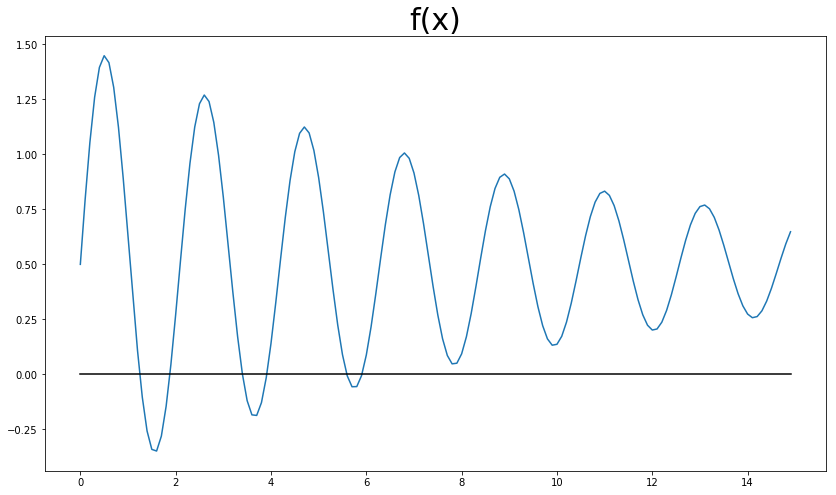

In [62]:
from numpy import arange
x = arange(0, 15, 0.1)

from matplotlib import pyplot as plt
y = zeros(x.size)
for i in range(x.size):
    y[i] = f2(x[i])
plt.plot(x, y)
plt.plot(x, zeros(x.size), color='black')
plt.title("f(x)")
plt.show()

In [63]:
newton_raphson(f2, diff2, 12, 10E-5)

Exception: Unable to find a root

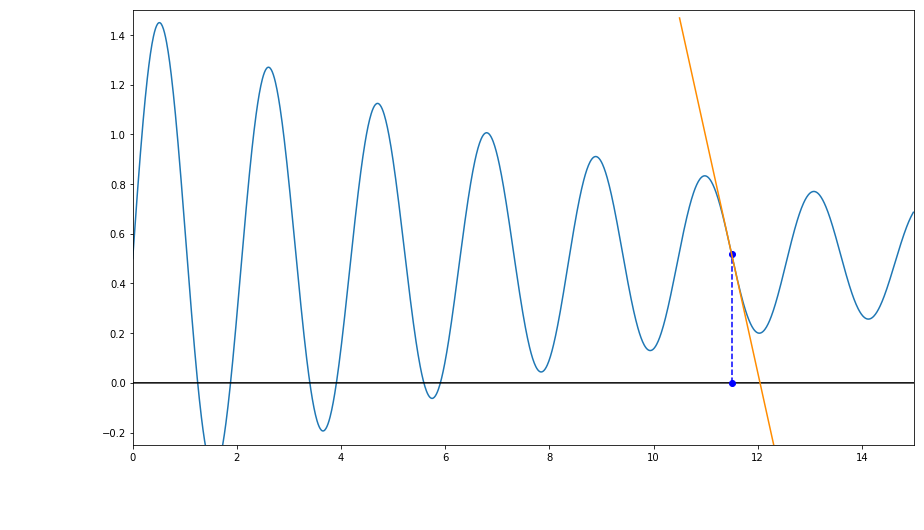

In [64]:
graph = newton_plot(f2, diff2, 0, 15, -0.25, 1.5, 11.5, False)
graph.show()

$\Rightarrow$ initialization has to be sufficiently close to the root.

### A safer implementation

The following implementation falls back on bisection when:
* $f'(x)=0$
* The root estimate goes outside of the bracket

In [65]:
def newton_raphson_safe(f, diff, tol, a, b, max_iter=1000):
    '''
    '''
    fa = f(a)
    fb = f(b)
    if sign(fa) == sign(fb):
        raise Exception("Root is not bracketed")
    x = (a+b)/2 # initial guess for Newton-Raphson
    for i in range(max_iter):
        # Try a Newton-Raphson iteration
        try:
            diff_x = diff(x)
            if diff_x == 0:
                raise NewtonRaphsonError("Derivative is 0")
            delta_x = -f(x)/diff(x)
            x += delta_x
            if x > b or x < a:
                raise NewtonRaphsonError("Estimate is going out of bound")
        except NewtonRaphsonError as e:
            # Fall back on bisection
            delta_x = (b-a)/2
            x = a + delta_x

        # Check for convergence
        if abs(delta_x) <= tol:
            return x
    
        # Tighten the bracket
        fx = f(x)
        if sign(fa) == sign(fx):
            a = x
            fa = fx
        else:
            b = x
            fb = fx
    raise NewtonRaphsonError("Cannot find root")
            
class NewtonRaphsonError(Exception):
    pass

In [66]:
x = newton_raphson_safe(f2, diff2, 10E-5, 0, 1.8)
print(x)

1.24793095061865


In [67]:
x = newton_raphson_safe(f1, diff1, 10E-5, -1, 2)
print(x)

1.414213562962298
